In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os



In [2]:

#TODO Introducir el dataset con el que se vaya a trabajar
df = pd.read_csv('data_jci/jci_output.csv')
df_copy = df[['identificacion', 'ddd', 'dddstd', 'dddx', 'fhora', 'hr', 'lluv', 'pres', 'temp', 'ts', 'vel', 'velx', 'qdato']]
df_copy['fhora'] = pd.to_datetime(df_copy['fhora'])
df_copy['ddd'] = np.radians(df_copy['ddd'])
df_copy = df_copy.sort_values('fhora')

In [9]:
df_copy['ddd'].head(20)

KeyError: "['fhora'] not in index"

In [5]:
# Convierte la columna 'fhora' a un índice de tiempo
df_copy['fhora'] = pd.to_datetime(df_copy['fhora'])
df_copy = df_copy.set_index('fhora')

# Agrupa por hora y calcula la media
df_resampled = df_copy.resample('H').mean()

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\3608954077.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_copy.resample('H').mean()


In [6]:
df_resampled.head(10)

#df_resampled.to_csv('jci_2020_resampled.csv')

,identificacion,ddd,dddstd,dddx,hr,lluv,pres,temp,ts,vel,velx,qdato
fhora,,,,,,,,,,,,
1988-02-01 00:00:00+00:00,89064.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1988-02-01 01:00:00+00:00,89064.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1988-02-01 02:00:00+00:00,89064.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1988-02-01 03:00:00+00:00,89064.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1988-02-01 04:00:00+00:00,89064.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1988-02-01 05:00:00+00:00,89064.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1988-02-01 06:00:00+00:00,89064.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1988-02-01 07:00:00+00:00,89064.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1988-02-01 08:00:00+00:00,89064.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [7]:
df_resampled.isnull().sum()

identificacion      7938
ddd                 7938
dddstd              7938
dddx                7938
hr                  7938
lluv              115098
pres              116025
temp              112906
ts                138329
vel               106031
velx              106813
qdato               7938
dtype: int64

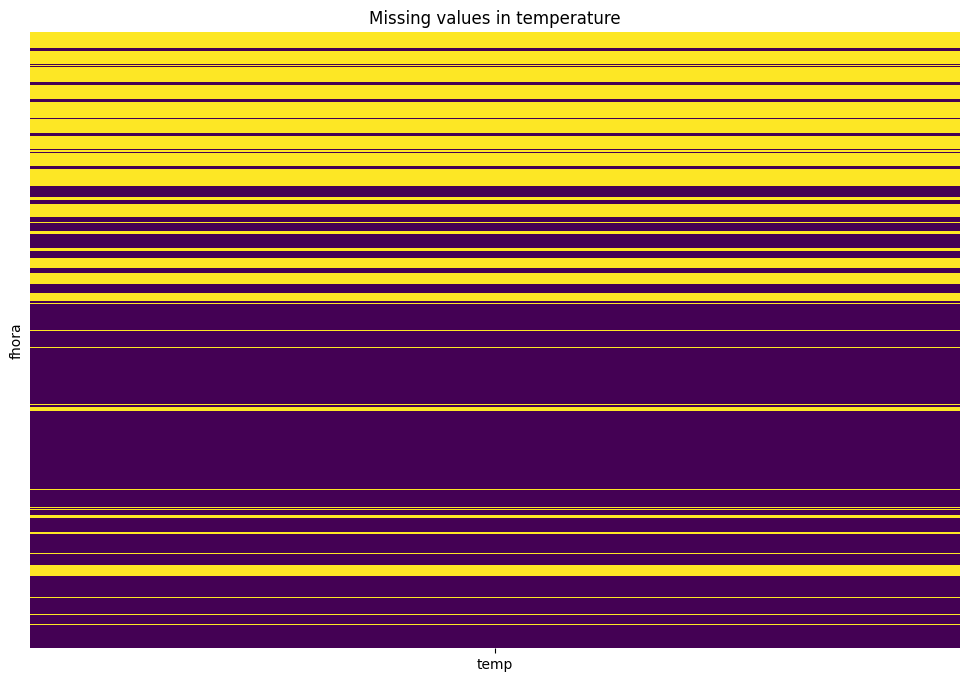

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_resampled[['temp']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing values in temperature')
plt.show()

<Figure size 1200x800 with 0 Axes>

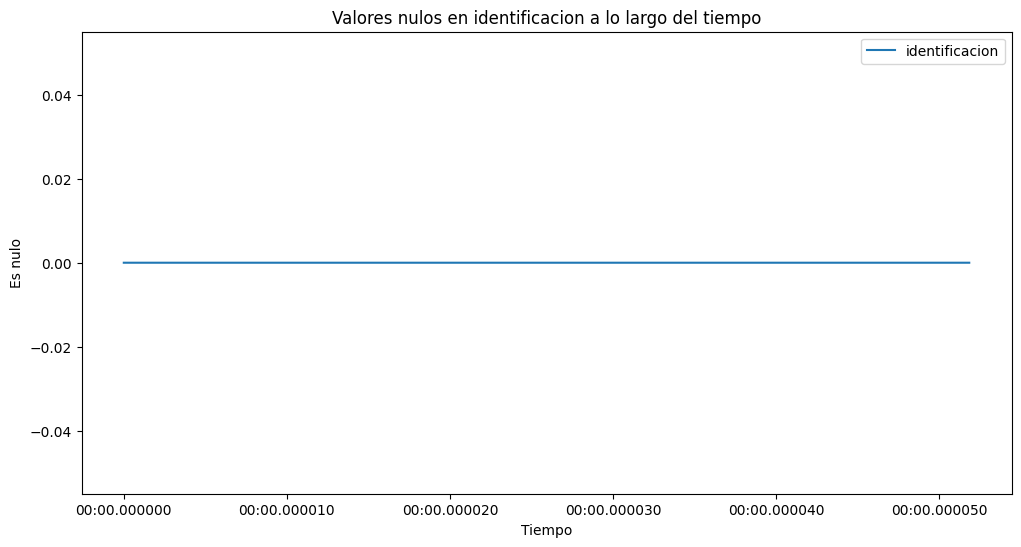

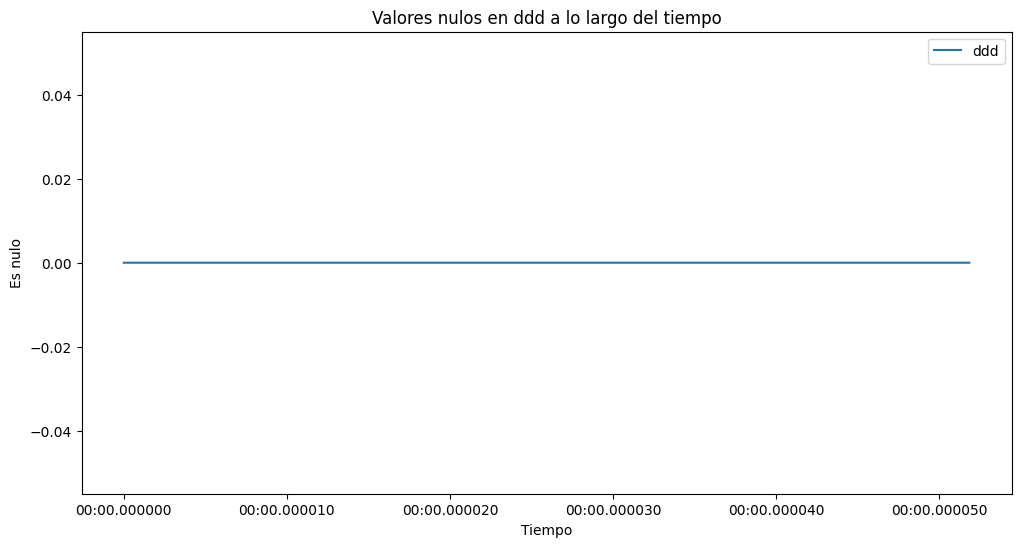

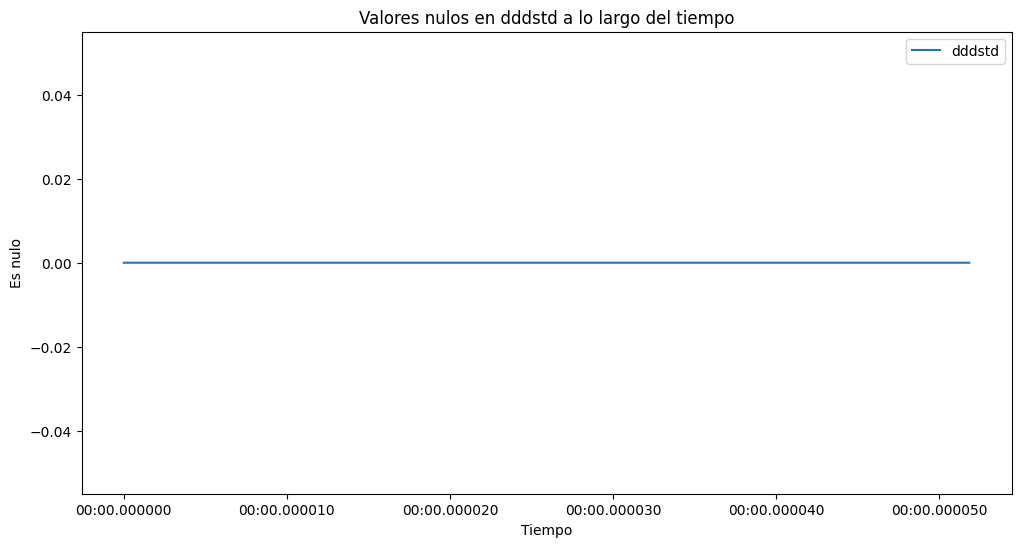

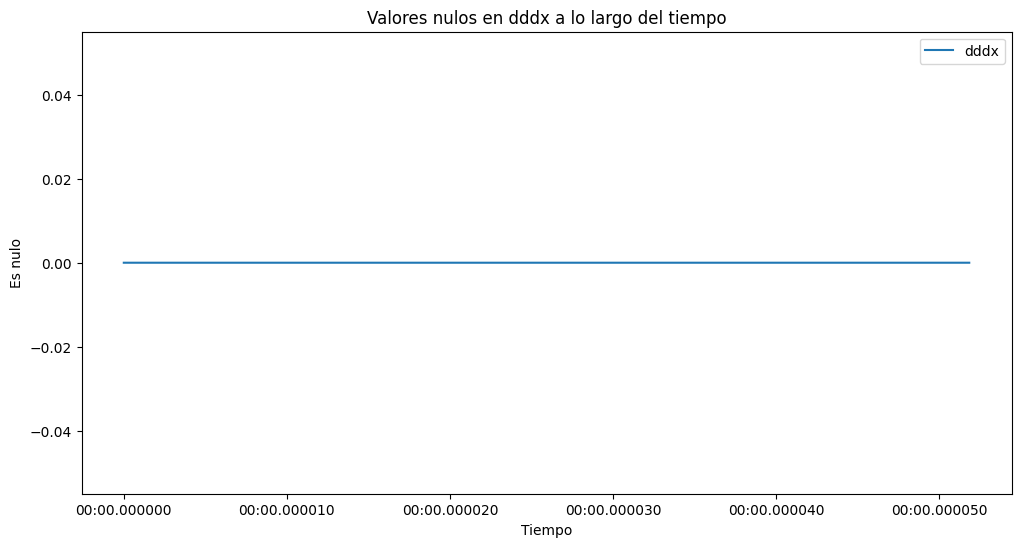

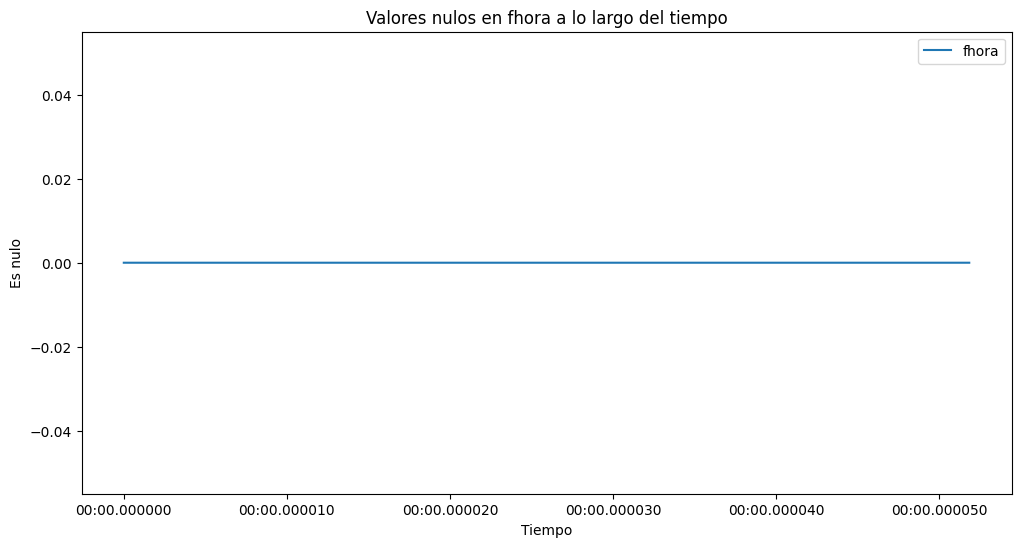

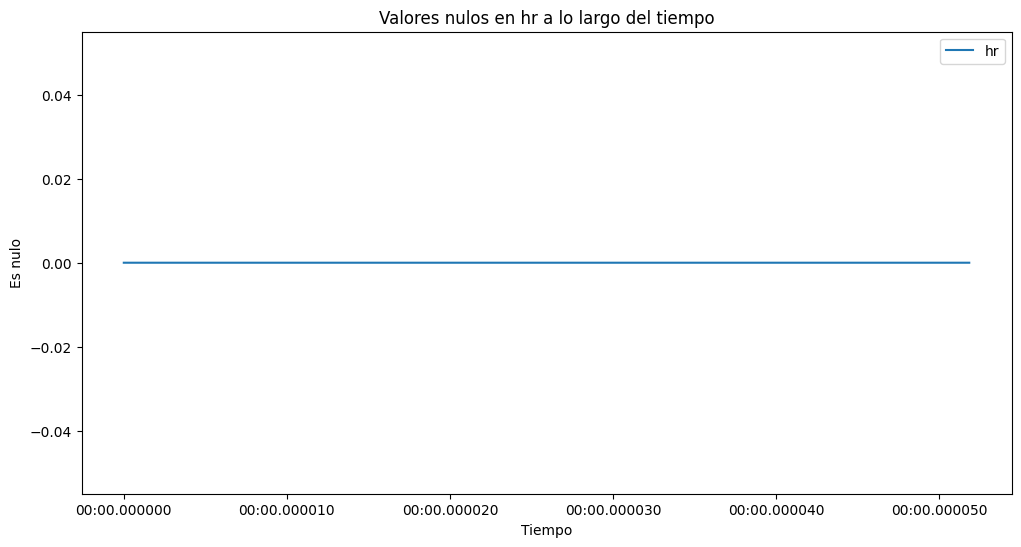

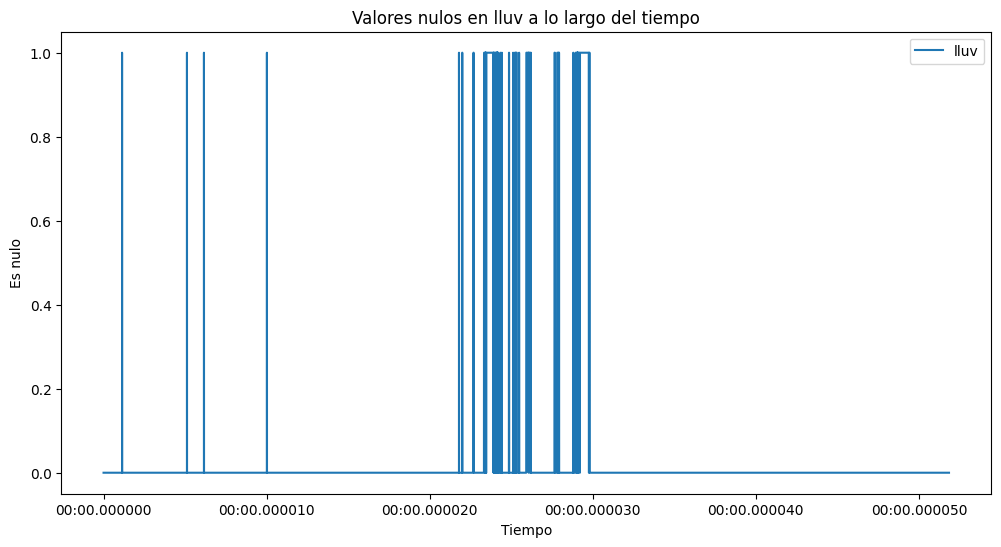

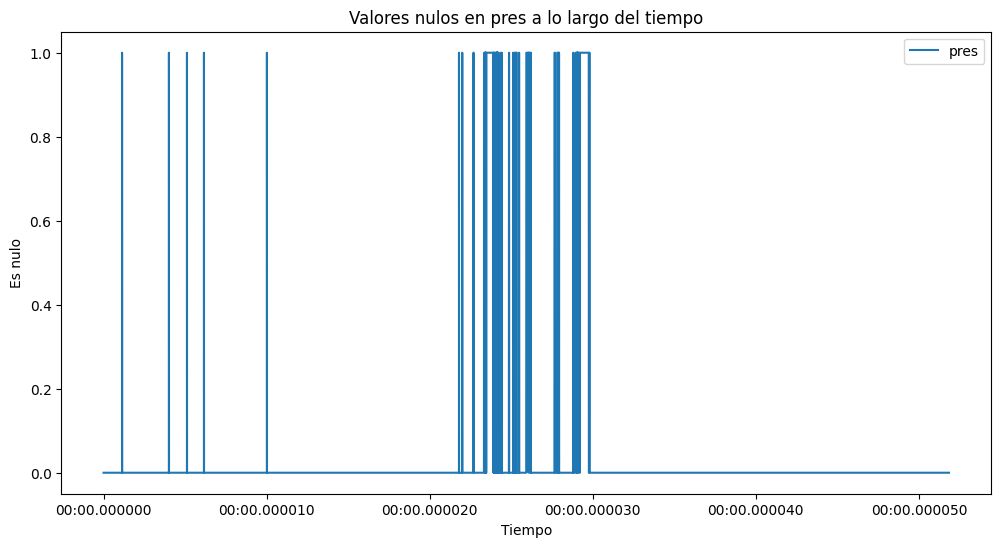

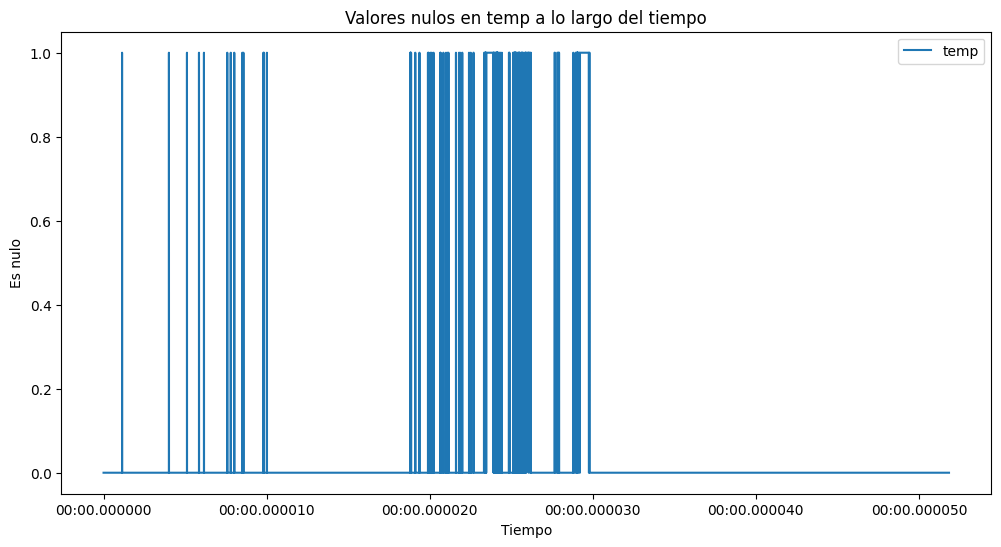

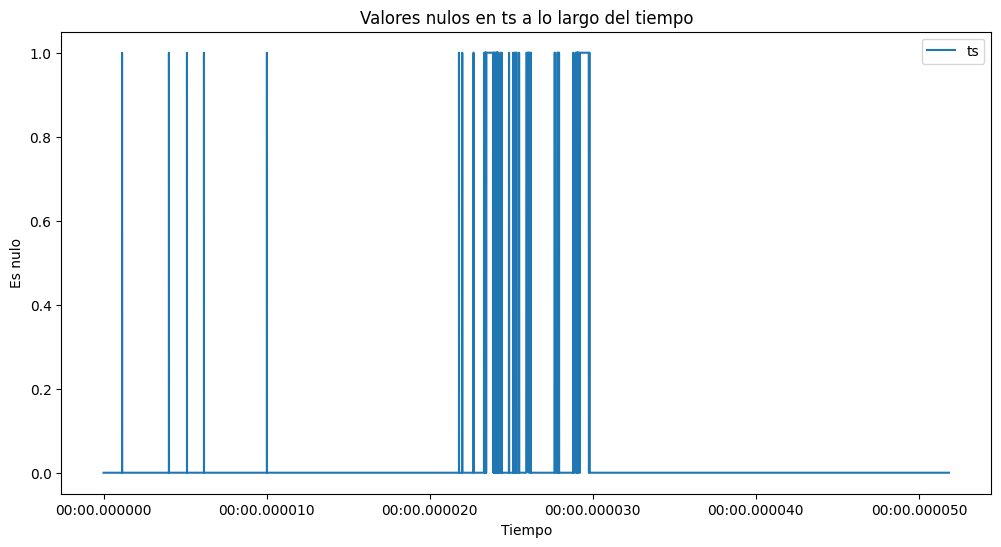

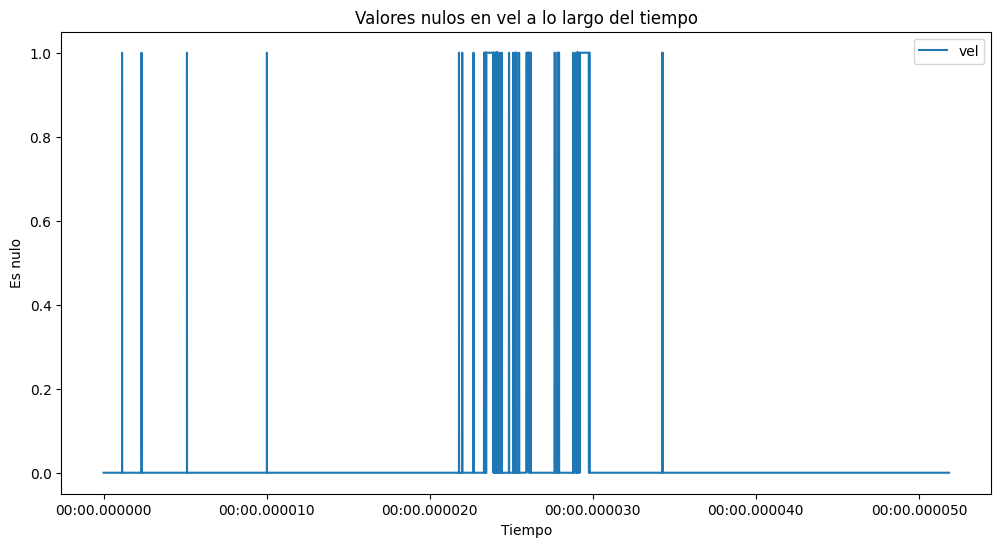

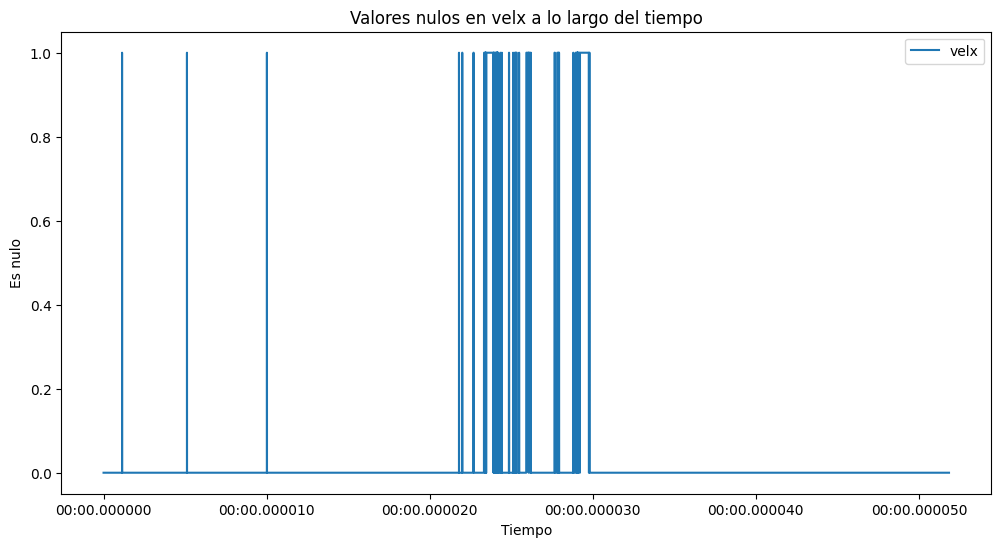

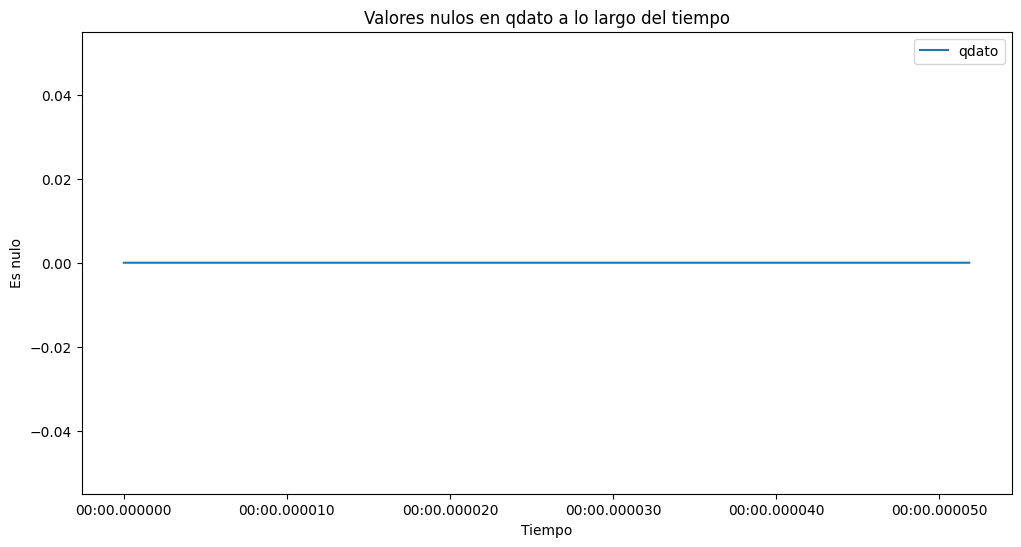

In [18]:


df_copy.index = pd.to_datetime(df_copy.index)

# Para cada columna en el DataFrame
for column in df_copy.columns:
   
    plt.plot(df_copy[column].isnull(), label=column)
    
    # Añade un título y etiquetas a los ejes
    plt.title(f'Valores nulos en {column} a lo largo del tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel('Es nulo')
    
    # Muestra la leyenda
    plt.legend()